In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import optimizers, losses, activations, models, layers, metrics, applications
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import os
parent_dir_path = os.path.dirname(os.getcwd())
parent_dir_path = parent_dir_path.replace("\\", "/")

In [3]:
train_data_file = parent_dir_path+"/DataPreparation/MobileNet_Data/train_1000_records_from_Schleusinger-Allee.hdf5"
train_data = pd.read_hdf(train_data_file, "IDMT_traffic")

test_data_file = parent_dir_path + "/DataPreparation/MobileNet_Data/test_60_records_from_Schleusinger-Allee.hdf5"
test_data = pd.read_hdf(test_data_file, "IDMT_traffic")

In [6]:
input_length = 48
N_MEL_COUNT = 73
lab_enc = LabelEncoder()
all_labels = lab_enc.fit_transform(train_data["source_direction"])
nclass = len(lab_enc.classes_)

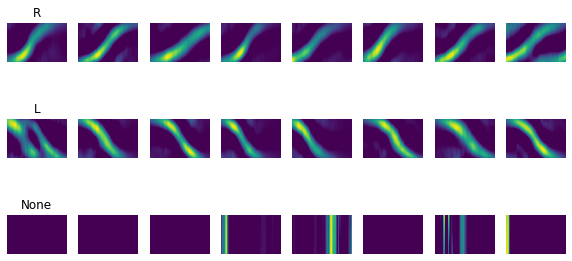

In [7]:
fig, m_axs = plt.subplots(nclass, 8, figsize = (10, 5))
for c_class, c_axs in zip(np.random.permutation(range(nclass)), m_axs):
    idxs = np.where(all_labels==c_class)[0]
    c_axs[0].set_title(lab_enc.classes_[c_class])
    for c_idx, c_ax in zip(np.random.permutation(idxs), c_axs):
        c_ax.axis('off')
        c_ax.imshow(train_data['SoundMap'].iloc[c_idx][:, :, 0])

In [12]:
train_X, valid_X, train_y, valid_y = train_test_split(
    train_data['SoundMap'],
    all_labels,
    test_size = 0.2, 
    random_state = 2018)
train_X, valid_X = tf.stack(train_X.to_numpy()), tf.stack(valid_X.to_numpy()) 
print('Training', train_X.shape, train_y.shape)
print('Validation', valid_X.shape, valid_y.shape)

Training (800, 48, 73, 1) (800,)
Validation (200, 48, 73, 1) (200,)


In [26]:
def f_measure(Y_true, Y_pred):
    true_positives = 0
    false_positives = 0
    true_elements = Y_true.count('L') + Y_true.count('R')
    
    for i in range(Y_true.shape[1]):
        if Y_true[i] == Y_pred[i]:
            if Y_pred[i] != 'None':
                true_positives += 1
        elif Y_pred[i] != 'None':
            false_positives += 1
    
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/true_elements
    return 2*precision*recall/(precision+recall)

In [29]:
import tensorflow as tf
from keras import layers, metrics, applications

def create_model():
    model = tf.keras.applications.mobilenet.MobileNet(input_shape=(48, 73, 1),
                                    classes=nclass,
                                    weights=None)
    opt = tf.keras.optimizers.Adam(lr=4e-4)
    
    model.compile(optimizer=opt, 
                  loss=losses.sparse_categorical_crossentropy,
                  metrics=['acc'])
    model.summary()
    return model
model = create_model()

Model: "mobilenet_1.00_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 48, 73, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 37, 32)        288       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 37, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 37, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 37, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 37, 32)       128       
 ation)                                          

In [33]:
batch_size = 64
epochs = 100

fit_results = model.fit(train_X, train_y,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(valid_X, valid_y))


Epoch 1/100
13/13 [==============================] - 11s 809ms/step - loss: 6.2534e-05 - acc: 1.0000 - val_loss: 0.0419 - val_acc: 0.9850
Epoch 2/100
13/13 [==============================] - 11s 847ms/step - loss: 1.1201e-04 - acc: 1.0000 - val_loss: 0.0437 - val_acc: 0.9850
Epoch 3/100
13/13 [==============================] - 11s 873ms/step - loss: 2.8787e-04 - acc: 1.0000 - val_loss: 0.0475 - val_acc: 0.9850
Epoch 4/100
13/13 [==============================] - 11s 873ms/step - loss: 3.7038e-05 - acc: 1.0000 - val_loss: 0.0501 - val_acc: 0.9850
Epoch 5/100
13/13 [==============================] - 11s 857ms/step - loss: 2.9870e-04 - acc: 1.0000 - val_loss: 0.0484 - val_acc: 0.9850
Epoch 6/100
13/13 [==============================] - 11s 866ms/step - loss: 4.5064e-05 - acc: 1.0000 - val_loss: 0.0498 - val_acc: 0.9850
Epoch 7/100
13/13 [==============================] - 12s 914ms/step - loss: 6.1953e-05 - acc: 1.0000 - val_loss: 0.0510 - val_acc: 0.9850
Epoch 8/100
13/13 [===============

13/13 [==============================] - 12s 888ms/step - loss: 7.8881e-05 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9900
Epoch 61/100
13/13 [==============================] - 12s 900ms/step - loss: 7.4945e-06 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9900
Epoch 62/100
13/13 [==============================] - 12s 891ms/step - loss: 7.6236e-06 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9900
Epoch 63/100
13/13 [==============================] - 12s 891ms/step - loss: 7.2483e-05 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9900
Epoch 64/100
13/13 [==============================] - 12s 890ms/step - loss: 1.1783e-05 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9900
Epoch 65/100
13/13 [==============================] - 12s 931ms/step - loss: 8.3335e-06 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9900
Epoch 66/100
13/13 [==============================] - 12s 896ms/step - loss: 3.6821e-05 - acc: 1.0000 - val_loss: 0.0626 - val_acc: 0.9900
Epoch 67/100
13/13 [====================

In [34]:
model.save("MobileNet_trained.h5")